In [2]:
import igraph as ig
import leidenalg as la
import networkx as nx
import cairo

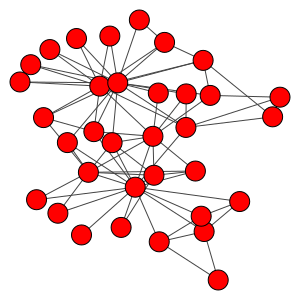

In [3]:
# Define the graph
G = ig.Graph.Famous('Zachary')

# Visualize the graph
ig.plot(G, bbox=(300, 300))


### Let's do the partition according to modularity

In [22]:
partition = la.find_partition(G, la.ModularityVertexPartition, max_comm_size=15 )

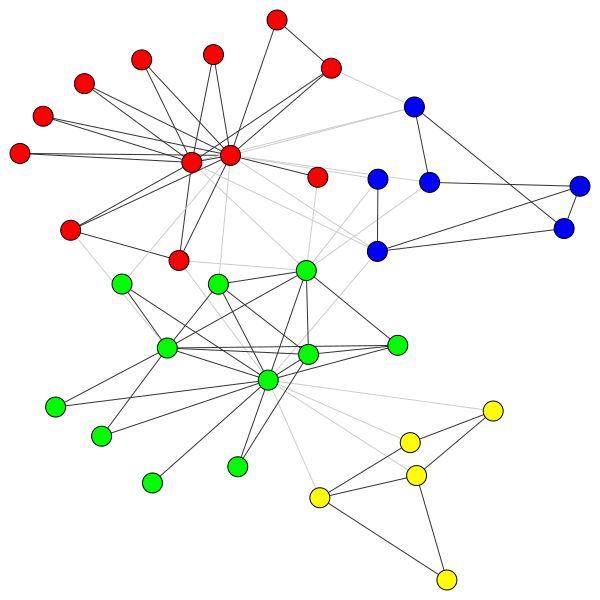

In [23]:
ig.plot(partition) 

### Now, let's do the partition based on CPMM (Constant Potts Model Hamiltonian), which is helpful in finding small communities

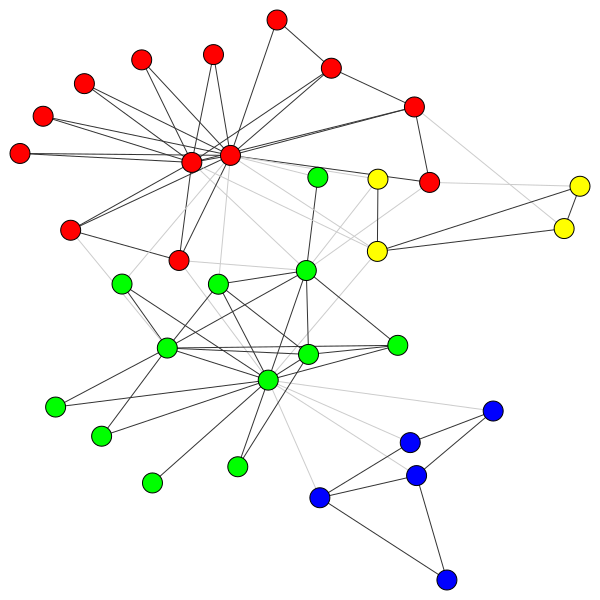

In [33]:
partition = la.find_partition(G, la.CPMVertexPartition, resolution_parameter = 0.05, max_comm_size=15)
ig.plot(partition) 

In [46]:
res = G.community_leiden(objective_function='modularity')

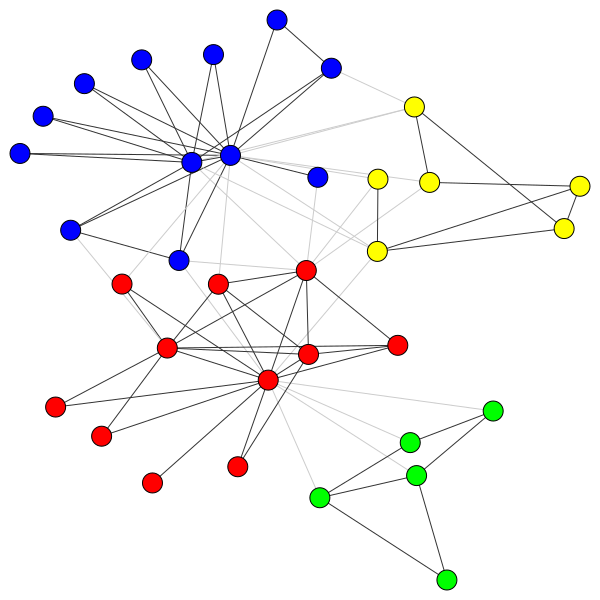

In [47]:
ig.plot(res)

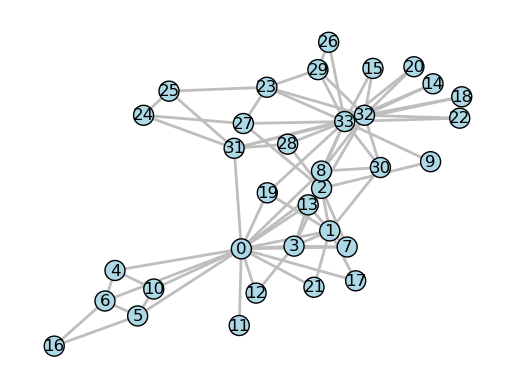

In [4]:
import igraph as ig
import matplotlib.pyplot as plt

# Load Zachary's Karate Club graph
karate_club_graph = ig.Graph.Famous('Zachary')

# Plot the graph
layout = karate_club_graph.layout("fr")
ig.plot(karate_club_graph, layout=layout)

# Optional: Display the graph using matplotlib (if not using igraph's built-in plotting)
fig, ax = plt.subplots()
ig.plot(
    karate_club_graph,
    target=ax,
    layout=layout,
    vertex_size=20,
    vertex_label=range(karate_club_graph.vcount()),
    vertex_color="lightblue",
    edge_color="grey",
    bbox=(400, 400),
    margin=20
)
plt.show()


IGRAPH UN-- 4 6 --
+ attr: name (v), summary (e)
+ edges (vertex names):
A -- B, C, D      B -- A, C         C -- A, B, D, D   D -- A, C, C
Edge from A to B with summary: edge_1
Edge from B to C with summary: edge_2
Edge from A to C with summary: edge_3
Edge from C to D with summary: edge_4
Edge from A to D with summary: edge_5
Edge from C to D with summary: edge_6


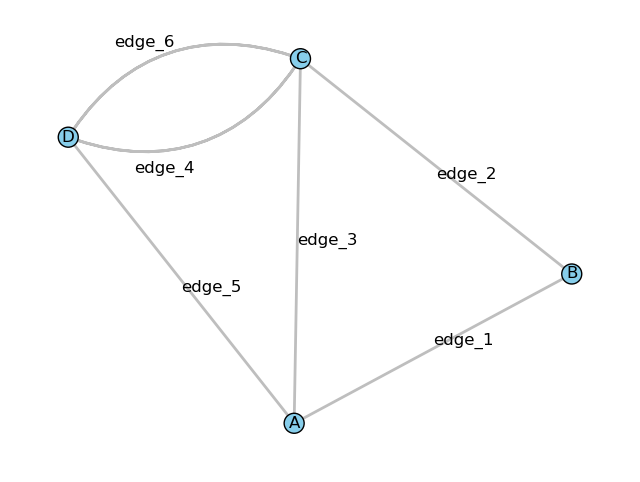

In [49]:
import igraph as ig
import matplotlib.pyplot as plt

# Sample list of tuples in the form (node_from, node_to, summary)
edges_list = [
    ('A', 'B', 'edge_1'),
    ('B', 'C', 'edge_2'),
    ('A', 'C', 'edge_3'),
    ('C', 'D', 'edge_4'),
    ('D', 'A', 'edge_5'),
    ('D', 'C', 'edge_6')
]

# Create an empty undirected graph
g = ig.Graph(directed=False)

# Create a set to track added nodes
added_nodes = set()

# Iterate over the list of tuples to add nodes and edges
for node_from, node_to, summary in edges_list:
    if node_from not in added_nodes:
        g.add_vertex(name=node_from)
        added_nodes.add(node_from)
    if node_to not in added_nodes:
        g.add_vertex(name=node_to)
        added_nodes.add(node_to)
    
    g.add_edge(node_from, node_to, summary=summary)

# Display the graph summary
print(g)

# Optionally, print edges with their attributes
for edge in g.es:
    print(f"Edge from {g.vs[edge.source]['name']} to {g.vs[edge.target]['name']} with summary: {edge['summary']}")

# Visualization using igraph and pycairo
layout = g.layout("fr")  # Fruchterman-Reingold layout

# Plot the graph
fig, ax = plt.subplots(figsize=(8, 6))
ig.plot(
    g,
    target=ax,
    layout=layout,
    vertex_label=g.vs["name"],
    edge_label=g.es["summary"],
    vertex_size=20,
    vertex_color="skyblue",
    vertex_label_color="black",
    edge_width=2,
    edge_color="gray",
    bbox=(800, 600),
    margin=40
)
plt.show()


IGRAPH UNW- 6 7 --
+ attr: name (v), weight (e)
+ edges (vertex names):
A--B, B--C, A--C, C--D, D--E, E--F, D--F
Clustering with 6 elements and 2 clusters
[0] A, B, C
[1] D, E, F


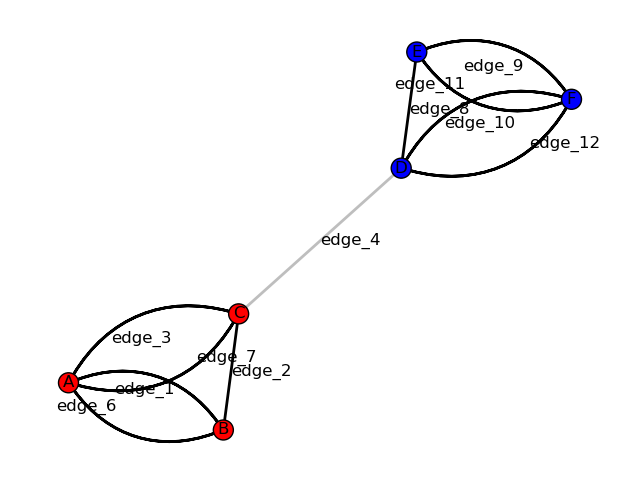

In [55]:
import igraph as ig
import matplotlib.pyplot as plt
from collections import defaultdict

# Sample list of tuples in the form (node_from, node_to, summary)
edges_list = [
    ('A', 'B', 'edge_1'),
    ('B', 'C', 'edge_2'),
    ('A', 'C', 'edge_3'),
    ('C', 'D', 'edge_4'),
    ('A', 'B', 'edge_6'),  # Another edge between A and B
    ('A', 'C', 'edge_7'),  # Another edge between A and C
    ('D', 'E', 'edge_8'),  # Another edge between D and E
    ('E', 'F', 'edge_9'),  # Another edge between E and F
    ('F', 'D', 'edge_10'), # Another edge between F and D
    ('F', 'E', 'edge_11'), # Another edge between F and G
    ('D', 'F', 'edge_12') # Another edge between D and F
]

# Create an empty undirected graph
g = ig.Graph(directed=False)

# Initialize vertex names attribute
g.vs['name'] = []

# Dictionary to store the number of edges between nodes
edge_counts = defaultdict(int)

# Function to add vertex if it does not exist
def add_vertex_if_not_exists(graph, node_name):
    if node_name not in graph.vs['name']:
        graph.add_vertex(name=node_name)

# Add vertices and edges to the graph
for node_from, node_to, summary in edges_list:
    add_vertex_if_not_exists(g, node_from)
    add_vertex_if_not_exists(g, node_to)
    g.add_edge(node_from, node_to, summary=summary)
    edge_counts[(node_from, node_to)] += 1
    edge_counts[(node_to, node_from)] += 1  # For undirected graph

# Create a new graph for clustering with weighted edges
g_weighted = ig.Graph(directed=False)

# Add vertices to the new graph
for v in g.vs:
    g_weighted.add_vertex(name=v["name"])

# Add weighted edges based on the edge_counts
added_edges = set()
for (node_from, node_to), weight in edge_counts.items():
    if (node_from, node_to) not in added_edges and (node_to, node_from) not in added_edges:
        g_weighted.add_edge(node_from, node_to, weight=weight)
        added_edges.add((node_from, node_to))

# Display the weighted graph summary
print(g_weighted)

# Perform clustering using the Louvain method on the weighted graph
clustering = g_weighted.community_multilevel(weights=g_weighted.es['weight'])

# Print clustering results
print(clustering)

# Assign colors to vertices based on cluster membership
colors = ["red", "blue", "green", "yellow", "purple", "orange"]
vertex_colors = [colors[clustering.membership[i] % len(colors)] for i in range(len(g.vs))]

# Determine edge colors based on whether they are internal or external to clusters
edge_colors = []
for edge in g.es:
    source = edge.source
    target = edge.target
    if clustering.membership[source] == clustering.membership[target]:
        edge_colors.append("black")  # Internal edge
    else:
        edge_colors.append("gray")   # External edge

# Visualization of the clustered graph
layout = g.layout("fr")  # Fruchterman-Reingold layout

# Plot the original graph with clustering results
fig, ax = plt.subplots(figsize=(8, 6))
ig.plot(
    g,
    target=ax,
    layout=layout,
    vertex_label=g.vs["name"],
    vertex_size=20,
    vertex_color=vertex_colors,
    vertex_label_color="black",
    edge_width=2,
    edge_label=[edge["summary"] for edge in g.es],
    edge_color=edge_colors,
    bbox=(800, 600),
    margin=40
)
plt.show()


Level 1 Clustering:
Clustering with 36 elements and 12 clusters
[ 0] Node_0, Node_1, Node_2
[ 1] Node_3, Node_4, Node_5
[ 2] Node_6, Node_7, Node_8
[ 3] Node_9, Node_10, Node_11
[ 4] Node_12, Node_13, Node_14
[ 5] Node_15, Node_16, Node_17
[ 6] Node_18, Node_19, Node_20
[ 7] Node_21, Node_22, Node_23
[ 8] Node_24, Node_25, Node_26
[ 9] Node_27, Node_28, Node_29
[10] Node_30, Node_31, Node_32
[11] Node_33, Node_34, Node_35


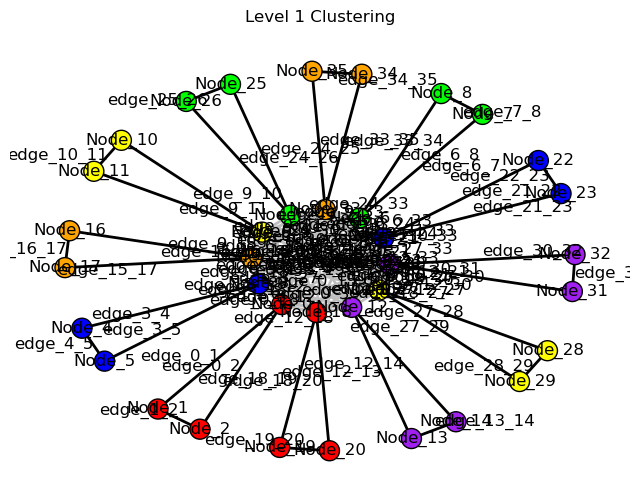

Level 2 Clustering:
Clustering with 12 elements and 1 clusters
[0] SuperNode_0, SuperNode_1, SuperNode_2, SuperNode_3, SuperNode_4,
    SuperNode_5, SuperNode_6, SuperNode_7, SuperNode_8, SuperNode_9,
    SuperNode_10, SuperNode_11


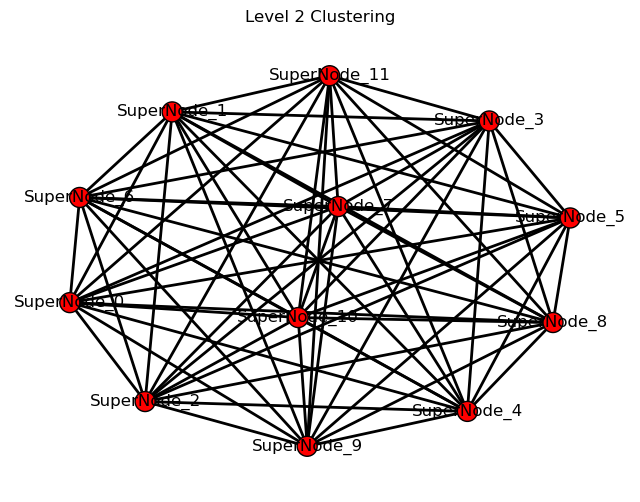

In [56]:
import igraph as ig
import matplotlib.pyplot as plt
from collections import defaultdict

# Define 36 nodes and edges to create initial clusters of 3 nodes each
nodes = [f'Node_{i}' for i in range(36)]
edges_list = []

# Create clusters of 3 nodes each
for i in range(0, 36, 3):
    edges_list.append((nodes[i], nodes[i+1], f'edge_{i}_{i+1}'))
    edges_list.append((nodes[i+1], nodes[i+2], f'edge_{i+1}_{i+2}'))
    edges_list.append((nodes[i], nodes[i+2], f'edge_{i}_{i+2}'))

# Add inter-cluster edges with fewer connections
for i in range(0, 36, 3):
    for j in range(i+3, 36, 3):
        edges_list.append((nodes[i], nodes[j], f'edge_{i}_{j}'))

# Create an empty undirected graph
g = ig.Graph(directed=False)

# Initialize vertex names attribute
g.vs['name'] = []

# Dictionary to store the number of edges between nodes
edge_counts = defaultdict(int)

# Function to add vertex if it does not exist
def add_vertex_if_not_exists(graph, node_name):
    if node_name not in graph.vs['name']:
        graph.add_vertex(name=node_name)

# Add vertices and edges to the graph
for node_from, node_to, summary in edges_list:
    add_vertex_if_not_exists(g, node_from)
    add_vertex_if_not_exists(g, node_to)
    g.add_edge(node_from, node_to, summary=summary)
    edge_counts[(node_from, node_to)] += 1
    edge_counts[(node_to, node_from)] += 1  # For undirected graph

# Create a new graph for clustering with weighted edges
g_weighted = ig.Graph(directed=False)

# Add vertices to the new graph
for v in g.vs:
    g_weighted.add_vertex(name=v["name"])

# Add weighted edges based on the edge_counts
added_edges = set()
for (node_from, node_to), weight in edge_counts.items():
    if (node_from, node_to) not in added_edges and (node_to, node_from) not in added_edges:
        g_weighted.add_edge(node_from, node_to, weight=weight)
        added_edges.add((node_from, node_to))

# Perform hierarchical clustering using the Louvain method on the weighted graph
clustering_level_1 = g_weighted.community_multilevel(weights=g_weighted.es['weight'])

# Print clustering results
print("Level 1 Clustering:")
print(clustering_level_1)

# Assign colors to vertices based on cluster membership
colors = ["red", "blue", "green", "yellow", "purple", "orange"]
vertex_colors = [colors[clustering_level_1.membership[i] % len(colors)] for i in range(len(g.vs))]

# Determine edge colors based on whether they are internal or external to clusters
edge_colors = []
for edge in g.es:
    source = edge.source
    target = edge.target
    if clustering_level_1.membership[source] == clustering_level_1.membership[target]:
        edge_colors.append("black")  # Internal edge
    else:
        edge_colors.append("gray")   # External edge

# Visualization of the clustered graph
layout = g.layout("fr")  # Fruchterman-Reingold layout

# Plot the original graph with Level 1 clustering results
fig, ax = plt.subplots(figsize=(8, 6))
ig.plot(
    g,
    target=ax,
    layout=layout,
    vertex_label=g.vs["name"],
    vertex_size=20,
    vertex_color=vertex_colors,
    vertex_label_color="black",
    edge_width=2,
    edge_label=[edge["summary"] for edge in g.es],
    edge_color=edge_colors,
    bbox=(800, 600),
    margin=40
)
plt.title("Level 1 Clustering")
plt.show()

# Create a new graph for Level 2 clustering
g_level_2 = ig.Graph(directed=False)

# Add super nodes for each community in Level 1 clustering
super_node_names = [f'SuperNode_{i}' for i in range(len(clustering_level_1))]
g_level_2.add_vertices(super_node_names)

# Add edges between super nodes based on inter-community edges
super_edge_counts = defaultdict(int)

for edge in g_weighted.es:
    source = edge.source
    target = edge.target
    source_cluster = clustering_level_1.membership[source]
    target_cluster = clustering_level_1.membership[target]
    
    if source_cluster != target_cluster:
        super_edge_counts[(source_cluster, target_cluster)] += edge["weight"]

added_super_edges = set()
for (source_cluster, target_cluster), weight in super_edge_counts.items():
    if (source_cluster, target_cluster) not in added_super_edges and (target_cluster, source_cluster) not in added_super_edges:
        g_level_2.add_edge(super_node_names[source_cluster], super_node_names[target_cluster], weight=weight)
        added_super_edges.add((source_cluster, target_cluster))

# Perform Level 2 clustering on the super graph
clustering_level_2 = g_level_2.community_multilevel(weights=g_level_2.es['weight'])

# Print clustering results for Level 2
print("Level 2 Clustering:")
print(clustering_level_2)

# Assign colors to super nodes based on cluster membership
super_vertex_colors = [colors[clustering_level_2.membership[i] % len(colors)] for i in range(len(g_level_2.vs))]

# Determine edge colors based on whether they are internal or external to clusters
super_edge_colors = []
for edge in g_level_2.es:
    source = edge.source
    target = edge.target
    if clustering_level_2.membership[source] == clustering_level_2.membership[target]:
        super_edge_colors.append("black")  # Internal edge
    else:
        super_edge_colors.append("gray")   # External edge

# Visualization of the super graph with Level 2 clustering results
super_layout = g_level_2.layout("fr")  # Fruchterman-Reingold layout

# Plot the super graph with Level 2 clustering results
fig, ax = plt.subplots(figsize=(8, 6))
ig.plot(
    g_level_2,
    target=ax,
    layout=super_layout,
    vertex_label=g_level_2.vs["name"],
    vertex_size=20,
    vertex_color=super_vertex_colors,
    vertex_label_color="black",
    edge_width=2,
    edge_color=super_edge_colors,
    bbox=(800, 600),
    margin=40
)
plt.title("Level 2 Clustering")
plt.show()


Level 1 Clustering:
Clustering with 36 elements and 6 clusters
[0] N0, N1, N2, N6, N7, N8
[1] N3, N4, N5, N9, N10, N11
[2] N12, N13, N14, N18, N19, N20
[3] N15, N16, N17, N21, N22, N23
[4] N24, N25, N26, N30, N31, N32
[5] N27, N28, N29, N33, N34, N35


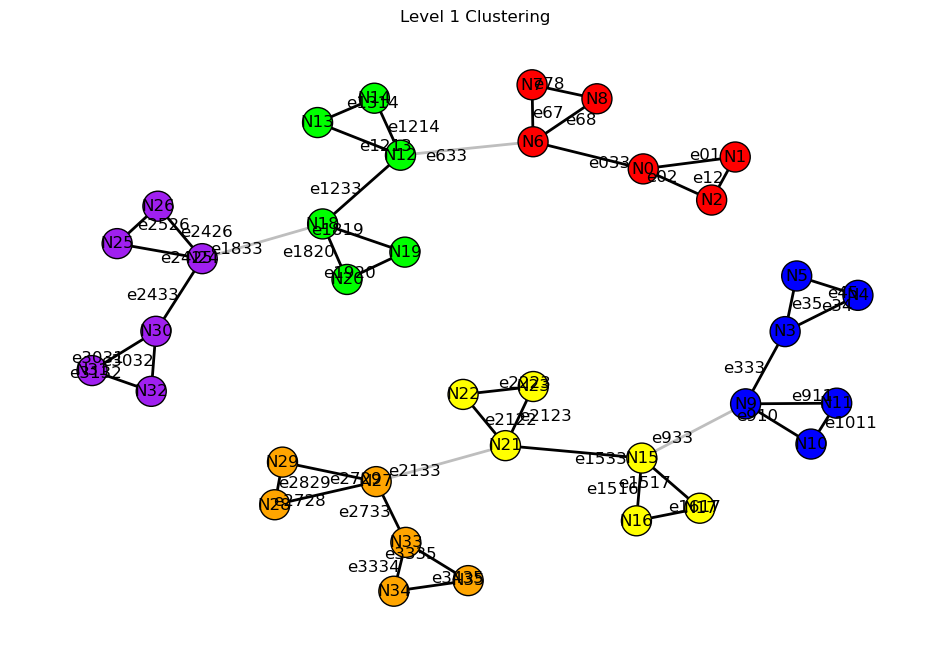

Level 2 Clustering:
Clustering with 6 elements and 2 clusters
[0] SN0, SN2, SN4
[1] SN1, SN3, SN5


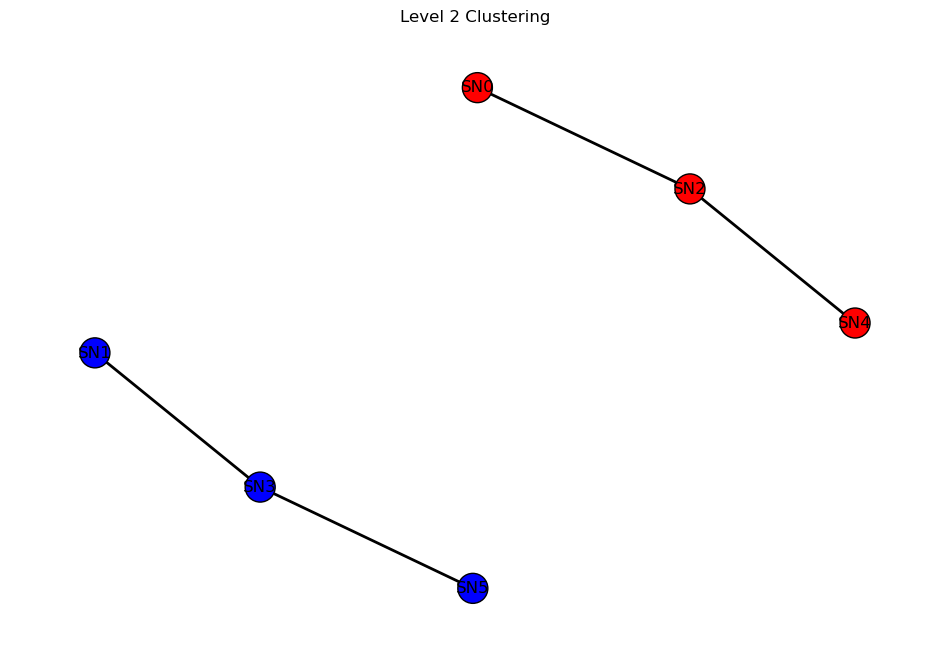

In [62]:
import igraph as ig
import matplotlib.pyplot as plt
from collections import defaultdict

# Define 36 nodes with shorter names and edges to create initial clusters of 3 nodes each
nodes = [f'N{i}' for i in range(36)]
edges_list = []

# Create clusters of 3 nodes each
for i in range(0, 36, 3):
    edges_list.append((nodes[i], nodes[i+1], f'e{i}{i+1}'))
    edges_list.append((nodes[i+1], nodes[i+2], f'e{i+1}{i+2}'))
    edges_list.append((nodes[i], nodes[i+2], f'e{i}{i+2}'))

# Add inter-cluster edges with fewer connections
for i in range(0, 30, 3):
    edges_list.append((nodes[i], nodes[i+6], f'e{i}{j}'))

# Create an empty undirected graph
g = ig.Graph(directed=False)

# Initialize vertex names attribute
g.vs['name'] = []

# Dictionary to store the number of edges between nodes
edge_counts = defaultdict(int)

# Function to add vertex if it does not exist
def add_vertex_if_not_exists(graph, node_name):
    if node_name not in graph.vs['name']:
        graph.add_vertex(name=node_name)

# Add vertices and edges to the graph
for node_from, node_to, summary in edges_list:
    add_vertex_if_not_exists(g, node_from)
    add_vertex_if_not_exists(g, node_to)
    g.add_edge(node_from, node_to, summary=summary)
    edge_counts[(node_from, node_to)] += 1
    edge_counts[(node_to, node_from)] += 1  # For undirected graph

# Create a new graph for clustering with weighted edges
g_weighted = ig.Graph(directed=False)

# Add vertices to the new graph
for v in g.vs:
    g_weighted.add_vertex(name=v["name"])

# Add weighted edges based on the edge_counts
added_edges = set()
for (node_from, node_to), weight in edge_counts.items():
    if (node_from, node_to) not in added_edges and (node_to, node_from) not in added_edges:
        g_weighted.add_edge(node_from, node_to, weight=weight)
        added_edges.add((node_from, node_to))

# Perform hierarchical clustering using the Louvain method on the weighted graph
clustering_level_1 = g_weighted.community_multilevel(weights=g_weighted.es['weight'])

# Print clustering results
print("Level 1 Clustering:")
print(clustering_level_1)

# Assign colors to vertices based on cluster membership
colors = ["red", "blue", "green", "yellow", "purple", "orange"]
vertex_colors = [colors[clustering_level_1.membership[i] % len(colors)] for i in range(len(g.vs))]

# Determine edge colors based on whether they are internal or external to clusters
edge_colors = []
for edge in g.es:
    source = edge.source
    target = edge.target
    if clustering_level_1.membership[source] == clustering_level_1.membership[target]:
        edge_colors.append("black")  # Internal edge
    else:
        edge_colors.append("gray")   # External edge

# Visualization of the clustered graph
layout = g.layout("fr")  # Fruchterman-Reingold layout

# Plot the original graph with Level 1 clustering results
fig, ax = plt.subplots(figsize=(12, 8))
ig.plot(
    g,
    target=ax,
    layout=layout,
    vertex_label=g.vs["name"],
    vertex_size=30,
    vertex_color=vertex_colors,
    vertex_label_color="black",
    edge_width=2,
    edge_label=[edge["summary"] for edge in g.es],
    edge_color=edge_colors,
    bbox=(1200, 800),
    margin=40
)
plt.title("Level 1 Clustering")
plt.show()

# Create a new graph for Level 2 clustering
g_level_2 = ig.Graph(directed=False)

# Add super nodes for each community in Level 1 clustering
super_node_names = [f'SN{i}' for i in range(len(clustering_level_1))]
g_level_2.add_vertices(super_node_names)

# Add edges between super nodes based on inter-community edges
super_edge_counts = defaultdict(int)

for edge in g_weighted.es:
    source = edge.source
    target = edge.target
    source_cluster = clustering_level_1.membership[source]
    target_cluster = clustering_level_1.membership[target]
    
    if source_cluster != target_cluster:
        super_edge_counts[(source_cluster, target_cluster)] += edge["weight"]

added_super_edges = set()
for (source_cluster, target_cluster), weight in super_edge_counts.items():
    if (source_cluster, target_cluster) not in added_super_edges and (target_cluster, source_cluster) not in added_super_edges:
        g_level_2.add_edge(super_node_names[source_cluster], super_node_names[target_cluster], weight=weight)
        added_super_edges.add((source_cluster, target_cluster))

# Perform Level 2 clustering on the super graph
clustering_level_2 = g_level_2.community_multilevel(weights=g_level_2.es['weight'])

# Print clustering results for Level 2
print("Level 2 Clustering:")
print(clustering_level_2)

# Assign colors to super nodes based on cluster membership
super_vertex_colors = [colors[clustering_level_2.membership[i] % len(colors)] for i in range(len(g_level_2.vs))]

# Determine edge colors based on whether they are internal or external to clusters
super_edge_colors = []
for edge in g_level_2.es:
    source = edge.source
    target = edge.target
    if clustering_level_2.membership[source] == clustering_level_2.membership[target]:
        super_edge_colors.append("black")  # Internal edge
    else:
        super_edge_colors.append("gray")   # External edge

# Visualization of the super graph with Level 2 clustering results
super_layout = g_level_2.layout("fr")  # Fruchterman-Reingold layout

# Plot the super graph with Level 2 clustering results
fig, ax = plt.subplots(figsize=(12, 8))
ig.plot(
    g_level_2,
    target=ax,
    layout=super_layout,
    vertex_label=g_level_2.vs["name"],
    vertex_size=30,
    vertex_color=super_vertex_colors,
    vertex_label_color="black",
    edge_width=2,
    edge_color=super_edge_colors,
    bbox=(1200, 800),
    margin=40
)
plt.title("Level 2 Clustering")
plt.show()
